# Model 2 - EfficientNetB0

## Installation

In [ ]:
# ! pip install kaggle

In [ ]:
#from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# ! mkdir ~/.kaggle

In [ ]:
# !cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
# ! kaggle competitions download HMS-Harmful-Brain-Activity-Classification

100% 18.4G/18.4G [03:31<00:00, 56.6MB/s]
100% 18.4G/18.4G [03:32<00:00, 93.2MB/s]


In [ ]:
# ! unzip HMS-Harmful-Brain-Activity-Classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: train_spectrograms/2080462125.parquet  
  inflating: train_spectrograms/208059969.parquet  
  inflating: train_spectrograms/2080686415.parquet  
  inflating: train_spectrograms/2080973847.parquet  
  inflating: train_spectrograms/2081117549.parquet  
  inflating: train_spectrograms/2081307623.parquet  
  inflating: train_spectrograms/2081826095.parquet  
  inflating: train_spectrograms/2081944512.parquet  
  inflating: train_spectrograms/2082016410.parquet  
  inflating: train_spectrograms/2082370788.parquet  
  inflating: train_spectrograms/2082376822.parquet  
  inflating: train_spectrograms/2082907673.parquet  
  inflating: train_spectrograms/2083007837.parquet  
  inflating: train_spectrograms/2083142969.parquet  
  inflating: train_spectrograms/2083155730.parquet  
  inflating: train_spectrograms/208321640.parquet  
  inflating: train_spectrograms/2083642063.parquet  
  inflating: train_spectrograms/2084695153.parquet

In [ ]:
#Download datasets not part of the competition
#! kaggle datasets download username/file-name-here

In [ ]:
# ! pip install pyarrow
# ! pip install --upgrade numpy
# ! pip install h5py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 44.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2


In [ ]:
# ! pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 30.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
# pip install --upgrade --force-reinstall scikit-learn

  Using cached scikit_learn-1.4.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)
  Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.2/301.2 kB 27.0 MB/s eta 0:00:00
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.4.0
    Uninstalling threadpoolctl-3.4.0:
      Successfully uninstalled threadpoolctl-3.4.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: joblib
    Found existing installation: joblib 1.4.0
    Uninstalling joblib-1.4.0:
      Successfully uninstalled joblib-1.4.0
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling scipy-1.11.4:
      Successfully uninstalled scipy-1.11.4
  A

In [ ]:
# !pip install --upgrade scikit-learn

## Imports

In [ ]:
import numpy as np
import pandas as pd
import os
import glob
from tqdm import tqdm
import matplotlib.pyplot as plt
#import seaborn as sns
tqdm.pandas()
pd.options.display.max_colwidth = 10000

## Pre-Processing

In [ ]:
train_df = pd.read_csv(r'train.csv')

In [1]:
#Mapping train_eegs and train_spectogram
def create_id_mapping(paths_list):
    id_map = {}
    for path in paths_list:
        file_id = os.path.basename(path).split('.')[0]  # Corrected to extract the file ID correctly
        id_map[file_id] = path
    return id_map

def mapping_id(ids, id_map):
    return id_map.get(ids)

In [ ]:
#Create ID mappings (train_eeg_path_list and train_spectrograms_path_list)
train_eeg_path_list = glob.glob("train_eegs/*")
train_spectrograms_path_list = glob.glob("train_spectrograms/*")
eeg_id_map = create_id_mapping(train_eeg_path_list)
spectrograms_id_map = create_id_mapping(train_spectrograms_path_list)

print("Mapping train_eeg_path_list","-"*60)
train_df['eeg_path'] = train_df['eeg_id'].astype(str).progress_apply(lambda x: mapping_id(x, eeg_id_map))

print("Mapping train_spectrograms_path_list","-"*60)
train_df['spectrograms_path'] = train_df['spectrogram_id'].astype(str).progress_apply(lambda x: mapping_id(x, spectrograms_id_map))

Mapping train_eeg_path_list ------------------------------------------------------------


100%|██████████| 106800/106800 [00:00<00:00, 2299345.88it/s]


Mapping train_spectrograms_path_list ------------------------------------------------------------


100%|██████████| 106800/106800 [00:00<00:00, 2344069.43it/s]


In [ ]:
train_df.head(1)

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote,eeg_path,spectrograms_path
0,1628180742,0,0.0,353733,0,0.0,127492639,42516,Seizure,3,0,0,0,0,0,train_eegs/1628180742.parquet,train_spectrograms/353733.parquet


In [ ]:
test_df = pd.read_csv(r'test.csv')

In [ ]:
#Create ID mappings (test_eeg_path_list and test_spectrograms_path_list)
test_eeg_path_list = glob.glob("test_eegs/*")
test_spectrograms_path_list = glob.glob("test_spectrograms/*")
eeg_id_map = create_id_mapping(test_eeg_path_list)
spectrograms_id_map = create_id_mapping(test_spectrograms_path_list)

print("Mapping test_eeg_path_list","-"*60)
test_df['eeg_path'] = test_df['eeg_id'].astype(str).progress_apply(lambda x: mapping_id(x, eeg_id_map))

print("Mapping test_spectrograms_path_list","-"*60)
test_df['spectrograms_path'] = test_df['spectrogram_id'].astype(str).progress_apply(lambda x: mapping_id(x, spectrograms_id_map))

Mapping test_eeg_path_list ------------------------------------------------------------


100%|██████████| 1/1 [00:00<00:00, 5857.97it/s]


Mapping test_spectrograms_path_list ------------------------------------------------------------


100%|██████████| 1/1 [00:00<00:00, 9020.01it/s]


In [ ]:
test_df.head(1)

,spectrogram_id,eeg_id,patient_id,eeg_path,spectrograms_path
0,853520,3911565283,6885,test_eegs/3911565283.parquet,test_spectrograms/853520.parquet


In [ ]:
#Create function - convert parquet file to .npy format
def parquet_to_numpy(parquet_path):
    #Read the Parquet file into a DataFrame
    spec_df = pd.read_parquet(parquet_path)

    #Process the DataFrame to convert it into a numpy array
    spec_array = spec_df.fillna(0).values[:, 1:].T  #fill NaN values with 0, transpose for (Time, Freq) -> (Freq, Time)
    spec_array = spec_array.astype("float32")

    return spec_array

In [ ]:
#Preprocesing image to get better visualization
def preprocess_spectrogram(image_array):

    #Normalization
    image_array = image_array.astype('float32')
    image_array -= np.min(image_array)
    image_array /= np.max(image_array) + 1e-4

    #Log Transformation
    image_array = np.log(image_array + 1e-4)

    #Mean Subtraction - help reduce bias and improve model stability
    mean = np.mean(image_array)
    image_array -= mean

    #Standardization
    std = np.std(image_array)
    image_array /= std + 1e-6

    return image_array

In [ ]:
#Create Train And Test Data Directory
current_dir = os.getcwd()
train_dir = os.path.join(current_dir, "train")
test_dir  = os.path.join(current_dir, "test")
print("train_dir--->", train_dir)
print("test_dir---->", test_dir)
os.makedirs(train_dir, exist_ok = True)
os.makedirs(test_dir, exist_ok = True)

train_dir---> /home/ash/projects/hw/hms-harmful-brain-activity-classification/train
test_dir----> /home/ash/projects/hw/hms-harmful-brain-activity-classification/test


In [ ]:
 #Dump Train Spectograms Data To Train Dir
 from PIL import Image

 for i in tqdm(train_df['spectrograms_path'].unique()):
     img_array = preprocess_spectrogram(parquet_to_numpy(i))

     img_name = os.path.basename(i).split('.')[0] + ".jpeg"
     spectrograms_path = os.path.join(train_dir, "spectrograms")
     os.makedirs(spectrograms_path, exist_ok=True)

     plt.imsave(os.path.join(spectrograms_path, img_name), img_array)

100%|██████████| 11138/11138 [04:22<00:00, 42.40it/s]


In [ ]:
 #Dumping Test Spectograms to the Test Dir
 from PIL import Image

 for i in tqdm(test_df['spectrograms_path'].unique()):
     img_array = preprocess_spectrogram(parquet_to_numpy(i))

     img_name = os.path.basename(i).split('.')[0] + ".jpeg"
     spectrograms_path = os.path.join(test_dir, "spectrograms")
     os.makedirs(spectrograms_path, exist_ok=True)

     plt.imsave(os.path.join(spectrograms_path, img_name), img_array)

100%|██████████| 1/1 [00:00<00:00, 44.05it/s]


In [ ]:
#Rename Train Image In Train Directory / Adding Class To The Train Image
xx = train_df['spectrograms_path expert_consensus'.split()].drop_duplicates().reset_index(drop = True)
dict_xx = dict(zip(xx['spectrograms_path'], xx['expert_consensus']))

In [ ]:
for original_path in tqdm(glob.glob("train/spectrograms/*")):
    #Extract the image ID from the file name
    img_id = os.path.basename(original_path).split('.')[-2]
    # Find the corresponding value in dict_xx based on the image ID
    xx = [v for k, v in dict_xx.items() if img_id in k][0]

    #Construct the new file name with the same directory path
    directory_path = os.path.dirname(original_path)
    new_filename = f"{xx}.{img_id}.jpeg"

    #Construct the new file path
    new_path = os.path.join(directory_path, new_filename)

    #Rename the file
    os.rename(original_path, new_path)

100%|██████████| 22276/22276 [00:08<00:00, 2487.15it/s]


In [ ]:
del xx, dict_xx

In [ ]:
#Plot The Random Image From The Directory
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

def plot_random_images(dir_path, num_images, folder_name):
    if not os.path.exists(dir_path):
        print("Directory does not exist.")
        return

    image_files = [f for f in os.listdir(dir_path) if f.endswith('.jpeg') or f.endswith('.png') or f.endswith('.jpg')]
    if len(image_files) == 0:
        print("No image files found in the directory.")
        return

    #Shuffle the list of image files
    random.shuffle(image_files)

    #Limit the number of images to plot
    num_images = min(num_images, len(image_files))

    #Calculate the number of rows and columns based on the aspect ratio of the images
    num_rows = int(num_images ** 0.5)
    num_cols = (num_images + num_rows - 1) // num_rows

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

    for i in range(num_images):
        img_path = os.path.join(dir_path, image_files[i])
        img = Image.open(img_path)

        row = i // num_cols
        col = i % num_cols

        ax = axes[row, col]
        ax.imshow(img, cmap="gray")
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xlabel(image_files[i], fontsize=8, wrap=True)

    #Hide any remaining empty subplots
    for i in range(num_images, num_rows * num_cols):
        row = i // num_cols
        col = i % num_cols
        axes[row, col].axis('off')

    plt.suptitle(folder_name, fontsize=16)
    plt.subplots_adjust(wspace=0.2, hspace=0.2)  # Adjust spacing between subplots
    plt.show()

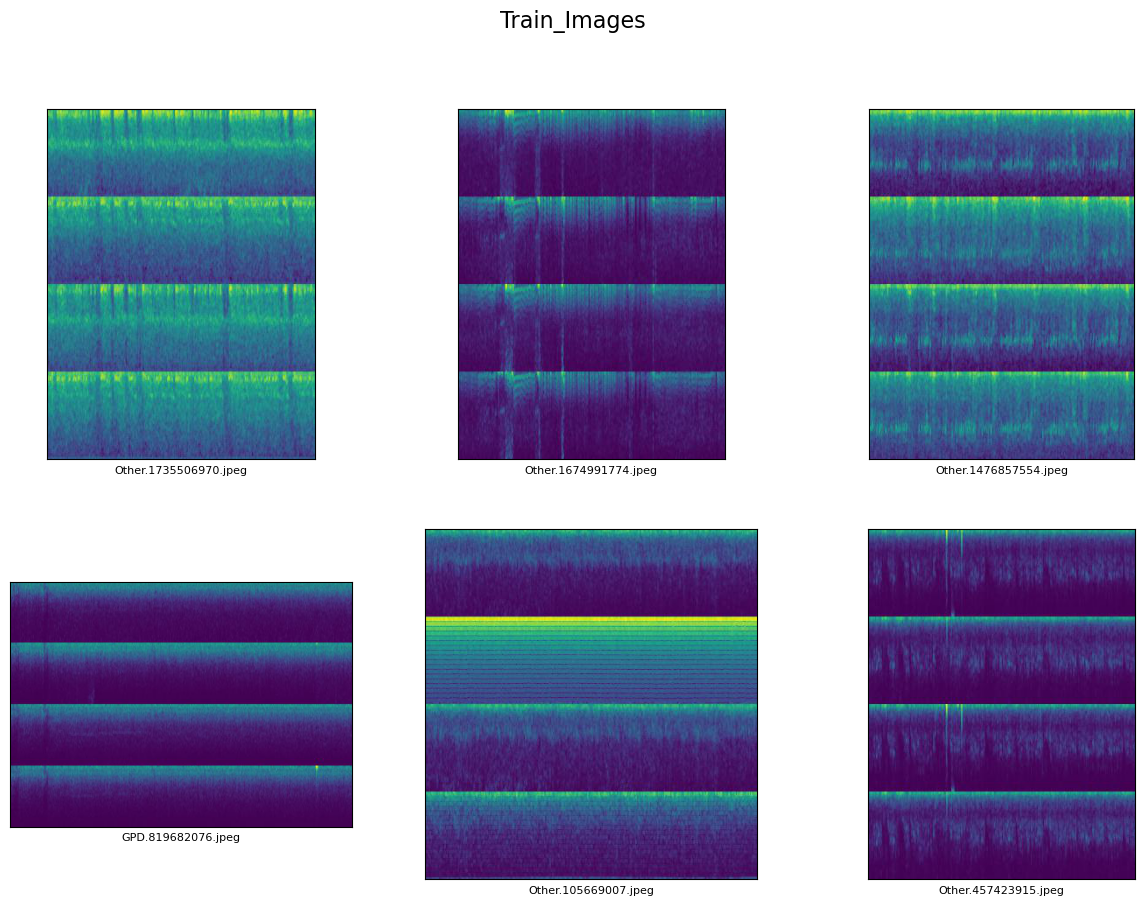

In [ ]:
training_dir_spectrograms = 'train/spectrograms'
plot_random_images(training_dir_spectrograms, 6, "Train_Images")

In [ ]:
#Create Train Data Frame Containing Training Image Path + Class With Their EEG_ID
def create_id_mapping(paths_list):
    id_map = {}
    for path in paths_list:
        file_id = os.path.basename(path).split('.')[1]  # Corrected to extract the file ID correctly
        id_map[file_id] = path
    return id_map

def mapping_id(ids, id_map):
    return id_map.get(ids)

In [ ]:
#Create ID mappings for train_eeg_path_list and train_spectrograms_path_list
train_spectrograms_path_list = glob.glob("train/spectrograms/*")
spectrograms_id_map = create_id_mapping(train_spectrograms_path_list)

train_df = train_df['eeg_id spectrogram_id expert_consensus'.split()].drop_duplicates().reset_index(drop = True)

train_df['spectrograms_path'] = train_df['spectrogram_id'].astype(str).progress_apply(lambda x: mapping_id(x, spectrograms_id_map))

100%|██████████| 18013/18013 [00:00<00:00, 2217747.32it/s]


In [ ]:
train_df['spectrograms_path']

0         train/spectrograms/Seizure.353733.jpeg
1             train/spectrograms/GPD.924234.jpeg
2            train/spectrograms/LRDA.999431.jpeg
3           train/spectrograms/LRDA.1084844.jpeg
4        train/spectrograms/Seizure.1219001.jpeg
                          ...                   
18008     train/spectrograms/LPD.2146798838.jpeg
18009     train/spectrograms/LPD.2146798838.jpeg
18010     train/spectrograms/LPD.2146798838.jpeg
18011     train/spectrograms/LPD.2147312808.jpeg
18012    train/spectrograms/LRDA.2147388374.jpeg
Name: spectrograms_path, Length: 18013, dtype: object

In [ ]:
#Train And Validation Split
train_df.head(2)

,eeg_id,spectrogram_id,expert_consensus,spectrograms_path
0,1628180742,353733,Seizure,train/spectrograms/Seizure.353733.jpeg
1,2277392603,924234,GPD,train/spectrograms/GPD.924234.jpeg


In [ ]:
import sklearn
print(sklearn.__version__)

1.4.2


In [ ]:
from sklearn.model_selection import train_test_split
train_dataset, valid_dataset = train_test_split(train_df ,test_size = 0.3 , random_state = 42, shuffle = True,
                                               stratify = train_df['expert_consensus'])

In [ ]:
train_dataset.head(1)

,eeg_id,spectrogram_id,expert_consensus,spectrograms_path
1859,2316276690,226714583,Other,train/spectrograms/Seizure.226714583.jpeg


### Image Data Generator

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Define data generators
train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

2024-04-20 19:11:02.197543: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-20 19:11:02.197573: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-20 19:11:02.198473: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-20 19:11:02.202396: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-20 19:11:02.906895: W tensorflow/compiler/tf2

### Training Set Validation Set

In [ ]:
training_set = train_datagen.flow_from_dataframe(
                        dataframe = train_dataset,
                        x_col = 'spectrograms_path',
                        y_col = 'expert_consensus',
                        target_size=(299,299),
                        color_mode='rgb',
                        class_mode = 'categorical',
                        batch_size= 64)

validation_set = test_datagen.flow_from_dataframe(
                dataframe = valid_dataset,
                x_col = 'spectrograms_path',
                y_col = 'expert_consensus',
                color_mode='rgb',
                target_size = (299, 299),
                class_mode = 'categorical',
                batch_size = 64)

Found 12609 validated image filenames belonging to 6 classes.
Found 5404 validated image filenames belonging to 6 classes.


## EfficientNetB0 Models

### Model 1

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.losses import KLDivergence
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential

#Load the EfficientNetB0 model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

#Add GlobalAveragePooling2D layer
x = GlobalAveragePooling2D()(base_model.output)

#Add Dense layer with softmax activation for classification
outputs = Dense(6, activation='softmax')(x)

#Create the model
model1 = Model(inputs=base_model.input, outputs=outputs)

#Compile the model
model1.compile(optimizer=Adam(lr=0.001), loss=KLDivergence(), metrics=['accuracy'])

#Display the model summary
model1.summary()

#Train the model
history = model1.fit(
    training_set,
    validation_data=validation_set,
    epochs=10,
    batch_size=64,
    callbacks=[tf.keras.callbacks.LambdaCallback(
        on_epoch_end=lambda epoch, logs: print(f"Training loss after epoch {epoch+1}: {logs['loss']} - Validation loss: {logs['val_loss']}"))
])

2024-04-20 19:11:03.507334: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-20 19:11:03.507568: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-20 19:11:03.536469: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 299, 299, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 299, 299, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, 299, 299, 3)          0         ['normalization[0][0]']   

2024-04-20 19:11:19.144664: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2024-04-20 19:11:20.409776: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902
2024-04-20 19:11:21.452797: I external/local_xla/xla/service/service.cc:168] XLA service 0x73838c525bd0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-04-20 19:11:21.452827: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4090, Compute Capability 8.9
2024-04-20 19:11:21.452835: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (1): NVIDIA GeForce RTX 4090, Compute Capability 8.9
2024-04-20 19:11:21.457761: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash r

198/198 [==============================] - 96s 352ms/step - loss: 1.1633 - accuracy: 0.5680 - val_loss: 1.3927 - val_accuracy: 0.4950
Epoch 2/10
198/198 [==============================] - 68s 343ms/step - loss: 0.9263 - accuracy: 0.6566 - val_loss: 1.1431 - val_accuracy: 0.5922
Epoch 3/10
198/198 [==============================] - 69s 348ms/step - loss: 0.8450 - accuracy: 0.6864 - val_loss: 1.0084 - val_accuracy: 0.6504
Epoch 4/10
198/198 [==============================] - 69s 347ms/step - loss: 0.7630 - accuracy: 0.7151 - val_loss: 0.9522 - val_accuracy: 0.6530
Epoch 5/10
198/198 [==============================] - 69s 347ms/step - loss: 0.6866 - accuracy: 0.7397 - val_loss: 1.0893 - val_accuracy: 0.6219
Epoch 6/10
198/198 [==============================] - 69s 346ms/step - loss: 0.6285 - accuracy: 0.7584 - val_loss: 1.0917 - val_accuracy: 0.6275
Epoch 7/10
198/198 [==============================] - 69s 348ms/step - loss: 0.5731 - accuracy: 0.7767 - val_loss: 1.2138 - val_accuracy: 0.6

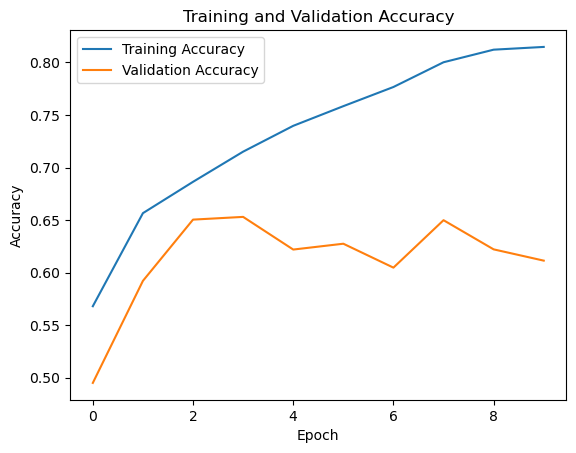

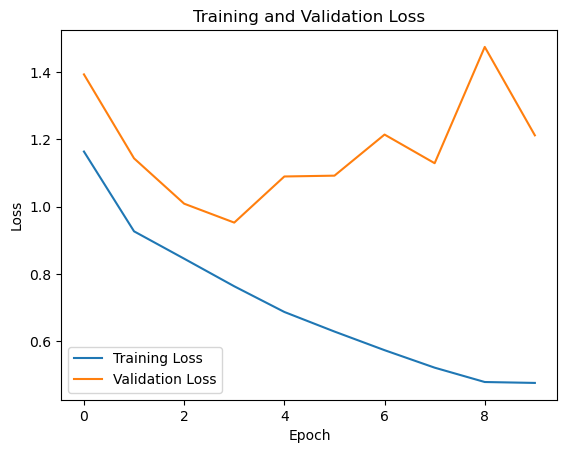

In [ ]:
#Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

#Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

### Model 2

In [ ]:
#Load the EfficientNetB0 model pretrained on ImageNet without the top classification layer
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

#Freeze the pretrained layers to prevent them from being trained again
base_model.trainable = False

#Create a new model on top of the pretrained base model
model2 = Sequential([
    base_model,  # Add the EfficientNetB0 base model
    GlobalAveragePooling2D(),  # Global average pooling layer
    Dense(6, activation='softmax')  # Dense output layer with softmax activation for multi-class classification
])

#Compile the model
model2.compile(optimizer='adam', loss=KLDivergence(), metrics=['accuracy'])

#Print the model summary
model2.summary()

#Train the model
history = model2.fit(
    training_set,
    validation_data=validation_set,
    epochs=10,
    batch_size=64,
    callbacks=[tf.keras.callbacks.LambdaCallback(
        on_epoch_end=lambda epoch, logs: print(f"Training loss after epoch {epoch+1}: {logs['loss']} - Validation loss: {logs['val_loss']}"))
])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 10, 10, 1280)      4049571   
 )                                                               
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_1 (Dense)             (None, 6)                 7686      
                                                                 
Total params: 4057257 (15.48 MB)
Trainable params: 7686 (30.02 KB)
Non-trainable params: 4049571 (15.45 MB)
_________________________________________________________________
Epoch 1/10
198/198 [==============================] - 77s 359ms/step - loss: 1.4623 - accuracy: 0.4333 - val_loss: 1.3875 - val_accuracy: 0.4493
E

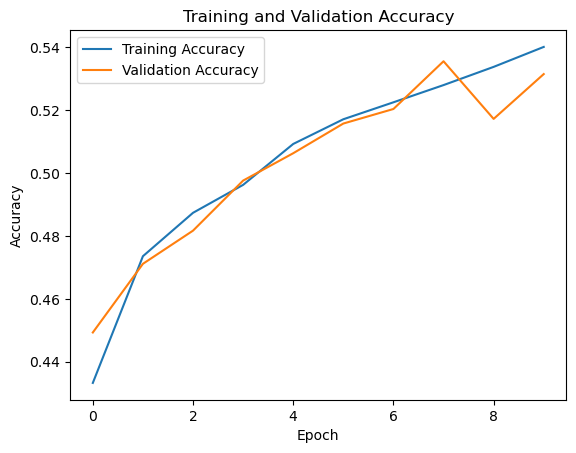

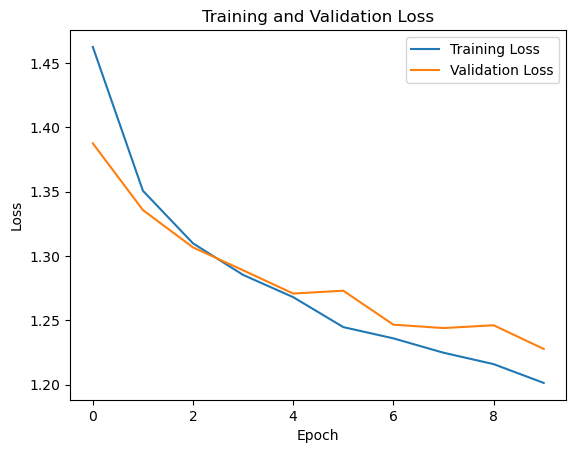

In [ ]:
#Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

#Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 10, 10, 1280)      4049571   
 )                                                               
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_1 (Dense)             (None, 6)                 7686      
                                                                 
Total params: 4057257 (15.48 MB)
Trainable params: 7686 (30.02 KB)
Non-trainable params: 4049571 (15.45 MB)
_________________________________________________________________


## Model Prediction Function

In [ ]:
print("Class Indeces Are :-->", validation_set.class_indices)

Class Indeces Are :--> {'GPD': 0, 'GRDA': 1, 'LPD': 2, 'LRDA': 3, 'Other': 4, 'Seizure': 5}


In [ ]:
from PIL import Image
from IPython.display import display
import matplotlib.image as mpimg
import cv2

In [ ]:
valid_dataset.head(1)

,eeg_id,spectrogram_id,expert_consensus,spectrograms_path
8627,3843295938,1023320297,Other,train/spectrograms/GPD.1023320297.jpeg


In [ ]:
#Model Prediction Function

def model_prediction(img_path, model, target_size=(299, 299)):
    #Load and preprocess the image
    img = Image.open(img_path)
    img_resized = img.resize(target_size)  #Resize the image

    #Expand the dimensions of the image array to match the input shape
    img_expanded = np.expand_dims(img_resized, axis=0)

    #Make prediction using the model
    predictions = model2.predict(img_expanded, verbose=False)
    predicted_class_index = np.argmax(predictions)

    #Map the predicted class index to its corresponding label
    predicted_label = next((class_label for class_label, index in validation_set.class_indices.items() if index == predicted_class_index), None)

    return predicted_label

In [ ]:
image_path = 'train/spectrograms/GPD.1023320297.jpeg'
model_prediction(image_path , model2)

'Other'

In [ ]:
valid_test =  valid_dataset['spectrograms_path expert_consensus'.split()].drop_duplicates().reset_index(drop = True).sample(10)
valid_test['ModelPrediction'] = valid_test['spectrograms_path'].progress_apply(lambda x: model_prediction(x, model2))

100%|██████████| 10/10 [00:03<00:00,  2.59it/s]


### Plotting Actual/Model Prediction

In [ ]:
def plot_predict(img_path, model):
    # Load the image
    img_array = cv2.imread(img_path)

    # Display the image
    plt.imshow(img_array)

    # Make prediction using the model
    prediction = model_prediction(img_path, model2)

    # Set the title and x label
    plt.title("Prediction: " + prediction, color='red')
    plt.xlabel("Actual Image: " + img_path.split('/')[-1].split('.')[0])

    plt.show()

In [ ]:
valid_dataset.head(1)

,eeg_id,spectrogram_id,expert_consensus,spectrograms_path
8627,3843295938,1023320297,Other,train/spectrograms/GPD.1023320297.jpeg


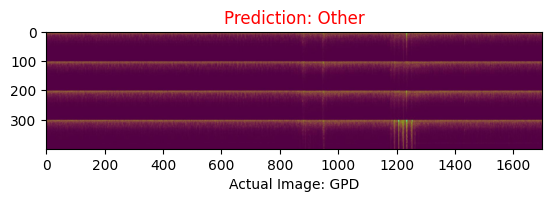

In [ ]:
img_path  = 'train/spectrograms/GPD.1023320297.jpeg'
plot_predict(img_path, model= model2)

###Prediction On The Test Data

In [ ]:
test_dir = 'test'
test_prediction = pd.DataFrame(glob.glob(test_dir+'/spectrograms/*'),columns = ['img_path'])
test_prediction['ModelPrediction'] = test_prediction['img_path'].progress_apply(lambda x: model_prediction(x, model= model2))


100%|██████████| 1/1 [00:00<00:00,  5.79it/s]


In [ ]:
test_prediction

,img_path,ModelPrediction
0,test/spectrograms/853520.jpeg,Other


In [ ]:
def model_probability(img_path, model, target_size=(299, 299)):
    #Load and preprocess the image
    img = Image.open(img_path)
    img = img.resize(target_size)

    #Expand the dimensions of the image array to match the input shape expected by the model
    expand_dim = np.expand_dims(img, axis=0)

    #Make prediction using the model
    predictions = model2.predict(expand_dim, verbose=False)[0]

    #Get class labels and indices
    class_indices = {v: k for k, v in validation_set.class_indices.items()}

    #Create dictionary with class labels as keys and model probabilities as values
    probabilities = {class_indices[i]: prob for i, prob in enumerate(predictions)}

    return probabilities

In [ ]:
img_path = 'test/spectrograms/853520.jpeg'
model_prob = model_probability(img_path, model= model2, target_size=(299, 299))
model_prob

{'GPD': 0.008091998,
 'GRDA': 0.295548,
 'LPD': 0.058446538,
 'LRDA': 0.16634467,
 'Other': 0.25448066,
 'Seizure': 0.2170882}

In [ ]:
#Create a DataFrame from the model probabilities
submission_df = pd.DataFrame([model_prob], columns=model_prob.keys())

#Add 'eeg_id' column from test_df as the first column
submission_df.insert(0, 'eeg_id', test_df['eeg_id'].copy())

#Rename the columns
submission_df.rename(columns={
    'Seizure': 'seizure_vote',
    'LPD': 'lpd_vote',
    'GPD': 'gpd_vote',
    'LRDA': 'lrda_vote',
    'GRDA': 'grda_vote',
    'Other': 'other_vote'
}, inplace=True)

In [ ]:
submission_df

,eeg_id,gpd_vote,grda_vote,lpd_vote,lrda_vote,other_vote,seizure_vote
0,3911565283,0.008092,0.295548,0.058447,0.166345,0.254481,0.217088
